# 12: FUNCIONES DE DISTRIBUCIÓN DE VALORES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Distribución UNIFORME

###### La función de distribución UNIFORME es aquella en que todos los valores tienen la misma probabilidad.

In [2]:
# Generar un dataset con distribución uniforme

uniforme = np.random.uniform(0, # valor mínimo
                             50, # valor máximo
                             100000) # número de muestras

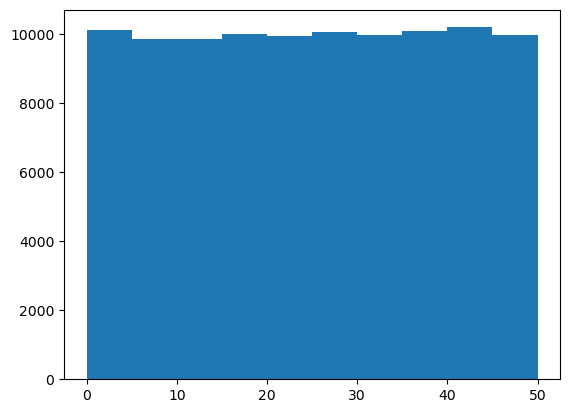

In [3]:
# Visualizar los datos en un plot

plt.hist(uniforme)

%matplotlib inline

In [4]:
# Otro método de crear datos de forma uniforme

uniforme_2 = np.random.randint(0, # valor mínimo 
                               50, # valor máximo
                               100000) # número de muestras

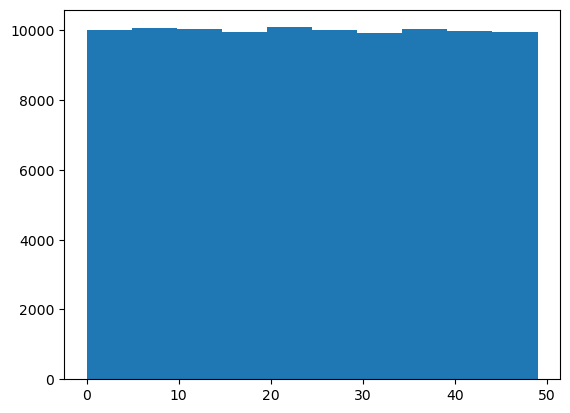

In [5]:
plt.hist(uniforme_2)

%matplotlib inline

### Distribución NORMAL

###### La función de distribución normal es aquella en la que los valores se distribuyen entorno a un valor concreto (la media) y se dispersan en torno a este valor mediante la desviación estándar.

In [6]:
# Generar un dataset con distribución NORMAL

normal = np.random.normal(20, # media 
                          5.5, # desviación estándar
                          1000000) # número de muestras

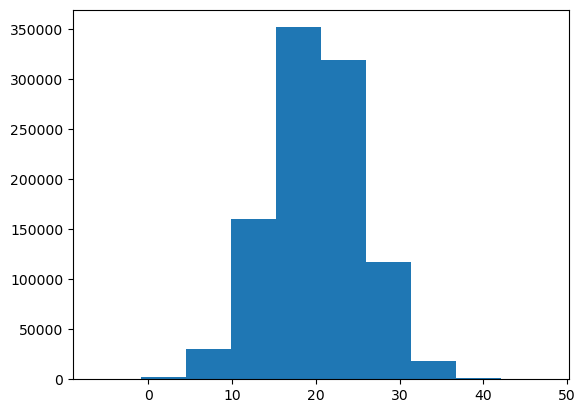

In [7]:
plt.hist(normal)

%matplotlib inline

In [8]:
# Otra forma de generar datos con distribución normal

normal_2 = np.random.randn(100000) # va a generar una distribución normal con media 0 y desviación estandar de 1 de 100000 muestras

(array([5.0000e+00, 1.6800e+02, 1.8240e+03, 1.0229e+04, 2.6852e+04,
        3.3822e+04, 2.0385e+04, 5.8340e+03, 8.2800e+02, 5.3000e+01]),
 array([-4.72340389, -3.83513658, -2.94686926, -2.05860194, -1.17033462,
        -0.28206731,  0.60620001,  1.49446733,  2.38273465,  3.27100196,
         4.15926928]),
 <BarContainer object of 10 artists>)

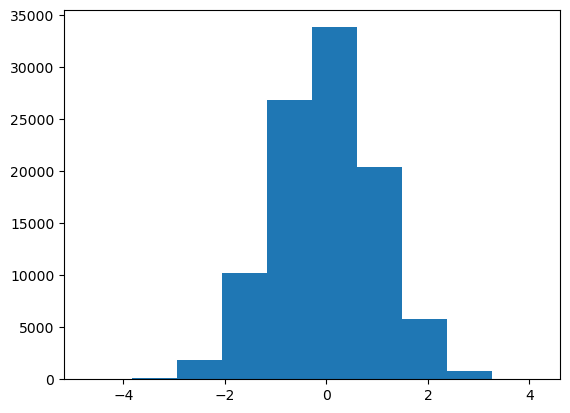

In [9]:
plt.hist(normal_2)

### Crear una distribución NORMAL mediante el teorema del valor central

##### Se utiliza el teorema del valor central. Este teorema transforma cualquier distribución normal en una con media 0 y desviación estándar 1.

### Z = (X - MEDIA) / SD --> X = MEDIA + (SD * Z)

In [10]:
# Generar un dataset normal con media 0 y desviación estandar 0

z = np.random.randn(10000000)

In [11]:
# Definir los valores deseados para la media y la desviación estándar

media = 33
sd = 2.5

In [12]:
# Utilizar el teorema del valor central para crear un nuevo dataset con los parametros deseados

normal_3 = media + sd * z

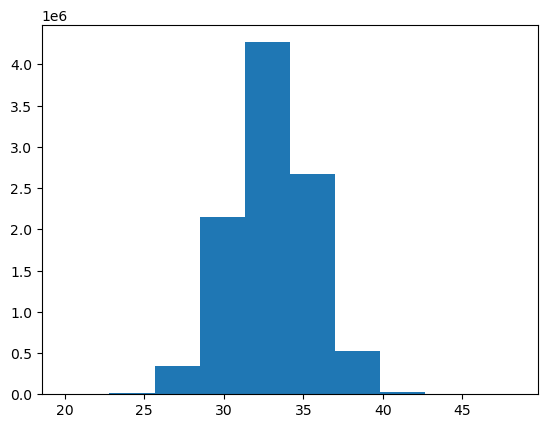

In [13]:
plt.hist(normal_3)

%matplotlib inline

### La simulación de Monte Carlo

##### Consiste en estimar el numero Pi mediante la generación de númreos aleatorios entre 0 y 1 N veces. ¿Como funciona?

##### Imaginemos una redonda de radio R dentro de un cuadrado de base 2R. La probabilidad de lanzar un dardo y que este caiga en la redonda es:

### area redonda (Pi * R^2) / area cuadrado (4 * R^2)

##### Si despejamos:

### Pi / 4

##### De este modo, si multiplicamos esta probabilidad  que hemos obtenido por 4, deberiamos de obtenre el número Pî. ¿Qué vamos a hacer pues?

##### - Generar n números X (entre -1 y 1) y n números Y (entre -1 y 1) estos números van a simular las coordenadas del lanzamiento del dardo.

##### - Ver si el dardo ha caido dentro o fuera del circulo: z = x^2 + y^2
######                                                         - si z > 1 --> Fuera del círculo
######                                                         - si z < 1 --> Dentro del círculo

##### - Luego, vamos a contar el número de veces que hemos caido dentro y lo vamos a dividir por el número total de casos para ver la probabilidad de caer dentro. Posteriormente, vamos a múltiplicar por 4 para estimar el número Pi.

##### - Vamos a repetir el experimento N veces para obtener diferentes estimaciones del número Pi y vamos a sacar la media de estimaciones

In [20]:
# Mi solución:

def monte_carlo(N, n): # N = número de experimentos, n = disaparos aleatorios

    estimacion_Pi = 0
    posible_Pi = []
    
    for i in range(N):

        contador = 0
        
        for j in range(n):
            
            x = np.random.uniform(-1, 1)
            y = np.random.uniform(-1, 1)
            z = (x * x) + (y * y)
            
            if z < 1:
                contador += 1

        probabilidad = contador / n
        
        posible_Pi.append(4 * probabilidad)

    estimacion_Pi = sum(posible_Pi) / N

    return estimacion_Pi

In [21]:
monte_carlo(200, 10000)

3.1400439999999996

In [22]:
# Solución del profe:

def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.140454


(3.140454, [<matplotlib.lines.Line2D at 0x15be7ffc560>])

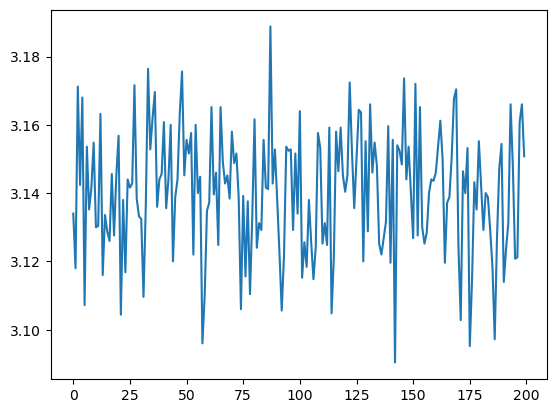

In [23]:
pi_montecarlo(10000, 200)